## Problem Statement 

- Using Binary classification with Reddit's API to develop a method to differentiate posts from either  Stocks and Bitcoin.

#### SCOPE
- USE REDDIT TO COLLECT POSTS
- EDA
- Train model to differentiate post
- Retrieve only posts and most common words
-  Select model that gives best score

# STOCKS API

## Returns data in .json format and Allows iterated requests and Provides after value for reference. Looping is done to reach 1000 posts at a time and can be Accessed with Python Request Library

In [193]:
import requests
import time 
import pandas as pd
import numpy as np

In [194]:
headers ={'user-agent':'shamini'}

In [195]:
url = 'https://www.reddit.com/r/stocks.json'

In [196]:
res = requests.get('https://www.reddit.com/r/stocks.json', headers= headers)

In [197]:
res.status_code

200

In [198]:
the_json = res.json()

In [199]:
sorted(the_json.keys())

['data', 'kind']

In [200]:
sorted(the_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [201]:
len(the_json['data']['children'])

27

In [202]:
the_json['data']['children'][0]['data']['selftext']

"Please use this thread to discuss your portfolio, learn of other stock tickers, and help out users by giving constructive criticism.\n\nWhy quarterly?  Public companies report earnings quarterly; many investors take this as an opportunity to rebalance their portfolios.  We highly recommend you do some reading:  A list of [relevant posts &amp; book recommendations.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_posts_.26amp.3B_book_recommendations)\n\nYou can find stocks on your own by using a scanner like your broker's or [Finviz.](https://finviz.com/screener.ashx)  To help further, here's a list of [relevant websites.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_websites.2Fapps)\n\nIf you don't have a broker yet, see our [list of brokers](https://www.reddit.com/r/stocks/wiki/index#wiki_brokers_for_investing) or search old posts.  If you haven't started investing or trading yet, then setup your [paper trading.](https://www.reddit.com/r/stocks/wiki/index#wiki_is

In [203]:
the_json['data']['children'][1]['data']

{'approved_at_utc': None,
 'subreddit': 'stocks',
 'selftext': 'This is the daily discussion, so anything stocks related is fine, but the theme for today is on stock options, but if options aren\'t your thing then just ignore the theme and/or [post your arguments against options here](https://www.reddit.com/r/stocks/search?q=author%3Aautomoderator+%22r%2Fstocks+semiannual+arguments+against+TA%22&amp;restrict_sr=on&amp;include_over_18=on&amp;sort=new&amp;t=all) and not in the current post.\n\nSome helpful day to day links, including news:\n\n* [Finviz](https://finviz.com/quote.ashx?t=amd) for charts, fundamentals, and aggregated news\n  * StreetInsider news:\n  * [Market Check](https://www.streetinsider.com/Market+Check) - Possibly why the market is doing what it\'s doing\n  * [Corporate News](https://www.streetinsider.com/Corporate+News)\n  * [Reuters aggregated](https://www.streetinsider.com/Reuters) - Global news\n  * [Economic data](https://www.streetinsider.com/Economic+Data)\n  * 

In [204]:
 from pandas.io.json import json_normalize

In [205]:
df_jason = json_normalize(the_json['data']['children'])

In [206]:
df_reddit = df_jason[['data.title', 'data.author','data.subreddit','data.domain','data.name','data.url',  ]]

In [207]:
pd.set_option('display.max_columns',None)

In [208]:
df_jason.columns

Index(['data.all_awardings', 'data.allow_live_comments',
       'data.approved_at_utc', 'data.approved_by', 'data.archived',
       'data.author', 'data.author_flair_background_color',
       'data.author_flair_css_class', 'data.author_flair_richtext',
       'data.author_flair_template_id', 'data.author_flair_text',
       'data.author_flair_text_color', 'data.author_flair_type',
       'data.author_fullname', 'data.author_patreon_flair',
       'data.banned_at_utc', 'data.banned_by', 'data.can_gild',
       'data.can_mod_post', 'data.category', 'data.clicked',
       'data.content_categories', 'data.contest_mode', 'data.created',
       'data.created_utc', 'data.discussion_type', 'data.distinguished',
       'data.domain', 'data.downs', 'data.edited', 'data.gilded',
       'data.hidden', 'data.hide_score', 'data.id', 'data.is_crosspostable',
       'data.is_meta', 'data.is_original_content',
       'data.is_reddit_media_domain', 'data.is_robot_indexable',
       'data.is_self', 'data

## The dataset consists of data that was scrapped from Reddit to pull the attributes of a Reddit post explained above. It includes, for each Reddit post collected, the data.title, data.author, data.subreddit and data.url

In [209]:
df_reddit

,data.title,data.author,data.subreddit,data.domain,data.name,data.url
0,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,stocks,self.stocks,t3_bvk4ry,https://www.reddit.com/r/stocks/comments/bvk4r...
1,r/Stocks Daily Discussion &amp; Options Tradin...,AutoModerator,stocks,self.stocks,t3_chkt69,https://www.reddit.com/r/stocks/comments/chkt6...
2,$TSLA earnings a miss,RunningJay,stocks,self.stocks,t3_chdw7v,https://www.reddit.com/r/stocks/comments/chdw7...
3,"AT&amp;T stock up 2.5% even though ""Stock is f...",StoxAndJox,stocks,self.stocks,t3_ch8t92,https://www.reddit.com/r/stocks/comments/ch8t9...
4,"Looking for niche stocks - self diagnosing, co...",krystianszastok,stocks,self.stocks,t3_chka2j,https://www.reddit.com/r/stocks/comments/chka2...
5,Why do prices seem to be increasing so much fa...,rustlerthejimmy,stocks,self.stocks,t3_chgo2b,https://www.reddit.com/r/stocks/comments/chgo2...
6,Foot Locker (FL) is a deep value stock right now,CortexExport,stocks,self.stocks,t3_chflgt,https://www.reddit.com/r/stocks/comments/chflg...
7,"If you entered the market on January 1st, 2000...",carnageta,stocks,self.stocks,t3_chgwmy,https://www.reddit.com/r/stocks/comments/chgwm...
8,Is it illegal to offer services like placing s...,pabbseven,stocks,self.stocks,t3_chlxwo,https://www.reddit.com/r/stocks/comments/chlxw...
9,Got a class action notice that needs to be pos...,homeadvice1,stocks,self.stocks,t3_chhhyk,https://www.reddit.com/r/stocks/comments/chhhy...


In [210]:
the_json['data']['after']

't3_chfkzt'

In [211]:
[post['data']['name'] for post in the_json['data']['children']]

['t3_bvk4ry',
 't3_chkt69',
 't3_chdw7v',
 't3_ch8t92',
 't3_chka2j',
 't3_chgo2b',
 't3_chflgt',
 't3_chgwmy',
 't3_chlxwo',
 't3_chhhyk',
 't3_chee0v',
 't3_chjgkb',
 't3_ch6bhg',
 't3_chk1a4',
 't3_chcn2n',
 't3_ch80qv',
 't3_ch8tsx',
 't3_chig54',
 't3_chiech',
 't3_chfwzr',
 't3_cgw34o',
 't3_chhvbt',
 't3_chh9iu',
 't3_cheenl',
 't3_chclpn',
 't3_chghaw',
 't3_chfkzt']

In [212]:
params = { 'after': 't3_cgeo8f'}

In [213]:
requests.get(url, params = params, headers  = headers)

<Response [200]>

In [214]:
 
posts_container = []
last_entry = None
 
 
urls = ['https://www.reddit.com/r/stocks.json']
 
for url in urls:
    print(url)
    for _ in range(70):
        if last_entry == None:
            params={}                             # important to set empty parameter for first launch
            
        else:
            params = {'after':last_entry}
        
        # instantiate request from url
        url = url
        response = requests.get(url,params = params, headers=headers)
        
        # collect all post in posts_container
        if response.status_code == 200:     
            js = response.json()
            posts_container.extend(js['data']['children'])
            last_entry = js['data']['after']      # set last entry in order to scroll to next page
            if last_entry == None:                # Exit after end of all posts are captured
                break
        else:
            print('error')
            break
        time.sleep(2)                             # Slow down download to prevent server overloading
    
    # putting together and write to csv
    length = len(posts_container)
    data = [(posts_container[i]['data']['title']) for i in range(length)]
    data = set(data)                              # remove duplicate posts
    data = pd.DataFrame(data,columns = ['post'])
    df_name = url.split('/')[-2]
    df = pd.DataFrame(data,columns = ['post'])
    
    
    #reset last entry
    last_entry = None

https://www.reddit.com/r/stocks.json


In [245]:
df.to_csv('/Users/shaminimagandran/Desktop/stocks.csv')

## BITCOIN API
## Returns data in .json format and Allows iterated requests and Provides after value for references. Looping is done to reach 1000 posts at a time and can be Accessed with Python Request Library

In [216]:
url = 'https://www.reddit.com/r/bitcoin.json'

In [217]:
res1 = requests.get('https://www.reddit.com/r/bitcoin.json', headers= headers)

In [218]:
headers ={'user-agent':'shamini'}

In [219]:
res1.status_code

200

In [220]:
the_json_1 = res1.json()

In [221]:
sorted(the_json_1.keys())

['data', 'kind']

In [222]:
sorted(the_json_1['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [223]:
len(the_json_1['data']['children'])

27

In [224]:
the_json_1['data']['children'][1]['data']['selftext']

"Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\nWe have a couple chat rooms now!\r\n\r\n* [General](https://s.reddit.com/channel/872992_609338364f5a4ced9f9431a4da06076a6ec995dd)\r\n\r\n* [Price Talk](https://s.reddit.com/channel/872992_d38a28dd2ee2efae707c89ce6491650e4a1bc078)\n\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/ch4res/daily_discussion_july_24_2019/) for unanswered questions."

In [225]:
the_json_1['data']['children'][1]['data']

{'approved_at_utc': None,
 'subreddit': 'Bitcoin',
 'selftext': "Please utilize this sticky thread for all general **Bitcoin** discussions! If you see posts on the front page or /r/Bitcoin/new which are better suited for this daily discussion thread, please help out by directing the OP to this thread instead. Thank you!\r\n\r\nIf you don't get an answer to your question, you can try phrasing it differently or commenting again tomorrow.\r\n\r\nWe have a couple chat rooms now!\r\n\r\n* [General](https://s.reddit.com/channel/872992_609338364f5a4ced9f9431a4da06076a6ec995dd)\r\n\r\n* [Price Talk](https://s.reddit.com/channel/872992_d38a28dd2ee2efae707c89ce6491650e4a1bc078)\n\nPlease check the [previous discussion thread](https://www.reddit.com/r/Bitcoin/comments/ch4res/daily_discussion_july_24_2019/) for unanswered questions.",
 'author_fullname': 't2_tcsf5',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Daily Discussion, July 25, 2019',
 'link_flai

In [226]:
 from pandas.io.json import json_normalize

In [227]:
df_j = json_normalize(the_json_1['data']['children'])

In [228]:
df_red  =  df_j[['data.title', 'data.author','data.subreddit','data.domain','data.name','data.url',  ]]

In [229]:
pd.set_option('display.max_columns',None)

In [230]:
df_j.columns

Index(['data.all_awardings', 'data.allow_live_comments',
       'data.approved_at_utc', 'data.approved_by', 'data.archived',
       'data.author', 'data.author_flair_background_color',
       'data.author_flair_css_class', 'data.author_flair_richtext',
       'data.author_flair_template_id',
       ...
       'data.title', 'data.total_awards_received', 'data.ups', 'data.url',
       'data.user_reports', 'data.view_count', 'data.visited',
       'data.whitelist_status', 'data.wls', 'kind'],
      dtype='object', length=171)

## The dataset consists of data that was scrapped from Reddit to pull the attributes of a Reddit post explained above. It includes, for each Reddit post collected, the data.title, data.author, data.subreddit and data.url

In [231]:
df_red

,data.title,data.author,data.subreddit,data.domain,data.name,data.url
0,Financial Services Hearing - Rep. Patrick McHe...,StopAndDecrypt,Bitcoin,youtube.com,t3_ceeopg,https://www.youtube.com/watch?v=h4aPp3wGufY
1,"Daily Discussion, July 25, 2019",rBitcoinMod,Bitcoin,self.Bitcoin,t3_chk9xj,https://www.reddit.com/r/Bitcoin/comments/chk9...
2,"Quick, upvote this to confuse everyone into th...",khaotickk,Bitcoin,i.redd.it,t3_chbx9d,https://i.redd.it/pcioshemnac31.gif
3,Andrew Yang Super PAC Will Accept Lightning-Po...,paycomnow,Bitcoin,coindesk.com,t3_chkuk3,https://www.coindesk.com/andrew-yang-super-pac...
4,It's nice to be able to use my favorite mug at...,dont_drink_the_milk,Bitcoin,i.imgur.com,t3_ch8zgr,https://i.imgur.com/YNrradc.gifv
5,$30 Million Shorts Liquidated on BitMEX,coinsmash1,Bitcoin,i.redd.it,t3_chgtoa,https://i.redd.it/0am2yu0omcc31.jpg
6,Poker site earns Guinness World Record for the...,CoreySteel,Bitcoin,highstakesdb.com,t3_chlkre,https://www.highstakesdb.com/9764-wpn-earns-gu...
7,Pretty much the nay sayers have a script they ...,Kashpantz,Bitcoin,i.redd.it,t3_chfo6f,https://i.redd.it/jhioc1qy3cc31.jpg
8,Norway’s Largest Airline Reveals Bitcoin (BTC)...,castorfromtheva,Bitcoin,dailyhodl.com,t3_chjo0q,https://dailyhodl.com/2019/07/24/norways-large...
9,People in US Trust Bitcoin More Than Facebook'...,kskelts,Bitcoin,coindesk.com,t3_ch9rir,https://www.coindesk.com/report-people-in-us-t...


In [232]:
the_json_1['data']['after']

't3_chk9zy'

In [233]:
params = { 'after': 't3_cg7tya'}

In [234]:
requests.get(url, params = params, headers  = headers)

<Response [200]>

In [235]:
posts_container = []
last_entry = None
 
 
urls = ['https://www.reddit.com/r/bitcoin.json']
 
for url in urls:
    print(url)
    for _ in range(70):
        if last_entry == None:
            params={}                             # important to set empty parameter for first launch
            
        else:
            params = {'after':last_entry}
        
        # instantiate request from url
        url = url
        response = requests.get(url,params = params, headers=headers)
        
        # collect all post in posts_container
        if response.status_code == 200:     
            js = response.json()
            posts_container.extend(js['data']['children'])
            last_entry = js['data']['after']      # set last entry in order to scroll to next page
            if last_entry == None:                # Exit after end of all posts are captured
                break
        else:
            print('error')
            break
        time.sleep(2)                             # Slow down download to prevent server overloading
    
    # putting together and write to csv
    length = len(posts_container)
    data = [(posts_container[i]['data']['title']) for i in range(length)]
    data = set(data)                              # remove duplicate posts
    data = pd.DataFrame(data,columns = ['post'])
    df_name = url.split('/')[-2]
    df2 = pd.DataFrame(data,columns = ['post'])
    
    
    #reset last entry
    last_entry = None

https://www.reddit.com/r/bitcoin.json


In [236]:
df2.to_csv('/Users/shaminimagandran/Desktop/bitcoin.csv')

## EXPLORATORY DATA ANALYSIS

## WORDCLOUD FOR STOCKS - MOST COMMON WORDS

In [252]:
df_stocks = pd.read_csv('/Users/shaminimagandran/Desktop/stocks.csv')

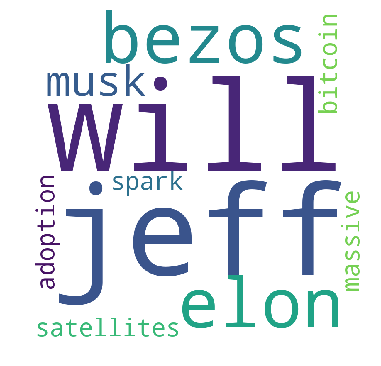

In [253]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in df_red['data.title']: 
        val = str(val) 
        tokens = val.split() 
for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
for words in tokens: 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## WORDCLOUD FOR BITCOIN - MOST COMMON WORDS

In [254]:
df_bitcoin = pd.read_csv('/Users/shaminimagandran/Desktop/bitcoin.csv')

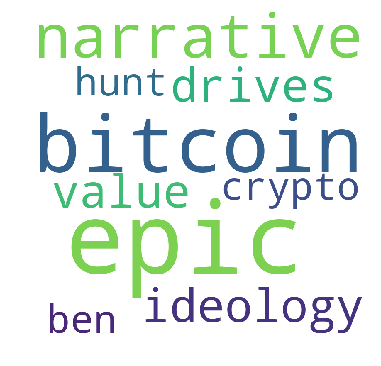

In [255]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in df_bitcoin['post']: 
        val = str(val) 
        tokens = val.split() 
for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
for words in tokens: 
    comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [256]:
df_stocks.shape

(781, 2)

In [257]:
df_bitcoin.shape

(864, 2)

## CREATE SINGLE INDEX
## ADD BINARY CLASSES:
## STOCKS= 1, BITCOIN = 0 
## GOAL: TO PREDICT WHETHER A POST CAME FROM STOCKS OR BITCOIN

In [258]:
df_stocks['stocks'] = np.full(shape = (len(df_stocks),1) ,fill_value = 1)

In [259]:
df_bitcoin['stocks'] = np.full(shape = (len(df_bitcoin),1) ,fill_value = 0)

In [260]:
dff = pd.concat([df_stocks,df_bitcoin],axis = 0, ignore_index =True)

In [261]:
dff.columns

Index(['Unnamed: 0', 'post', 'stocks'], dtype='object')

In [262]:
dff.drop(['Unnamed: 0'],axis =1, inplace = True)

In [263]:
dff

,post,stocks
0,Why does good earnings drive the price of a st...,1
1,Boeing shares fall on more uncertainty about t...,1
2,Y combinator,1
3,Tyson Foods should be a sbeneficiary of an Afr...,1
4,Question about AQN,1
5,Boeing 737 Max likely grounded until the end o...,1
6,Do you believe in Facebook’s Libra?,1
7,NFLX Forbes outlook,1
8,With a highly regarded brand and leadership po...,1
9,r/Stocks Daily Discussion &amp; Technicals Tue...,1


## DATA CLEANING

## CountVectorizer converts string into matrix of counts
## Set stop words to remove common English Words, punctuation and changing all to lower case

In [264]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

In [265]:
def clean_round_one (text):
    text = text.lower()                                            # change all text to lower case 
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)  # remove punctuation
    text = re.sub('\d','',text)                                    # remove digits
    return text

In [266]:
dff['post'].apply(clean_round_one)

0       why does good earnings drive the price of a st...
1       boeing shares fall on more uncertainty about t...
2                                            y combinator
3       tyson foods should be a sbeneficiary of an afr...
4                                      question about aqn
5       boeing  max likely grounded until the end of t...
6                      do you believe in facebook’s libra
7                                     nflx forbes outlook
8       with a highly regarded brand and leadership po...
9       rstocks daily discussion amp technicals tuesda...
10                                  any good penny stocks
11                    firstrade feedback from first month
12                                         zyxi ramblings
13                                 msft earnings thoughts
14                                         aerogel stocks
15             scanner used daily for thinkorswim trading
16                                         lannetts stock
17            

In [267]:
## TRAIN TEST SPLIT

## Train-Test Split is a very important part of predicting unseen data. Train-test split allows us to divide the sample data into two categories: train and test. The data in the train category is the data that our model is fed to make its predictions. The data in the test category is the data our model is exposed to and is expected to make predictions from using the data the model was fed in the train data. In our case, we will be making predictions of what posts belongs to which category.

In [268]:
dff.columns

Index(['post', 'stocks'], dtype='object')

In [269]:
X = dff["post"] 
y = dff["stocks"] 

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state= 35 ,stratify= y)

## Using TfidfVectorizer

## Term Frequency Inverse Document Frequency.
## Converts string to matrix with float values

In [271]:
dff.columns

Index(['post', 'stocks'], dtype='object')

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer(max_features= 500, stop_words="english")
cvec.fit(X_train, y_train)
X_train_cvec = pd.DataFrame(cvec.transform(X_train).todense(),
             columns=cvec.get_feature_names())
X_train_cvec.head()

,000,10,100,10k,11,15,18,19,200,2018,2019,2020,24,30,300,50,737,able,accept,account,action,advice,ahead,airlines,amazon,amd,american,americans,ammous,amp,analysis,analysts,app,apps,art,average,averaging,bad,bakkt,ban,bank,banks,beat,beats,beginners,beginning,best,better,big,billion,bitcoin,bitcoins,bitmex,block,blockchain,boeing,books,bought,broker,btc,business,buy,buying,canntrust,cap,capacity,capital,card,case,cash,center,central,ceo,change,chart,cheap,check,china,chinese,close,coinbase,com,come,coming,companies,company,complete,confirms,congress,considered,continue,contracts,control,corporate,cost,couple,court,crashes,create,crisis,crypto,cryptocurrencies,cryptocurrency,ctst,currency,dad,daily,data,day,days,deal,debit,demand,development,did,digital,dips,directly,dis,discussion,dividend,does,doesn,dollar,don,draper,drive,drop,drug,earning,earnings,economic,economics,economist,electric,end,energy,etf,etfs,exactly,exchange,exchanges,experience,facebook,fake,fast,favorite,fb,federal,fee,feel,fees,fiat,fidelity,finally,finance,financial,fixed,free,friday,friend,fund,fundamentals,funds,future,futures,fyi,g20,gain,gains,game,getting,giant,gift,global,goes,going,gold,good,google,got,governments,great,green,grounded,group,growth,guide,gulson,guys,halving,happened,happens,happy,hard,hashrate,having,hear,heard,help,hexo,high,hit,hodl,hodler,hold,holding,holdings,home,hours,huge,hype,idea,increase,increasing,index,india,indian,industry,instead,interesting,international,interview,invest,invested,investing,investment,investments,investors,iran,isn,issues,jul,july,june,just,know,knowledge,large,largest,launch,launching,laundering,laws,learn,legal,legit,lending,let,level,libra,lightning,like,likely,list,live,ll,loaded,long,looking,looks,loss,lost,low,major,make,makes,making,management,market,markets,mass,max,maybe,mayer,mcafee,mean,meat,media,medium,merger,microsoft,million,miners,mining,minutes,mnuchin,mobile,model,monday,money,month,moon,moving,msft,nakamoto,need,needed,negative,netflix,network,new,news,nflx,nice,nio,node,nokia,non,offer,offers,official,oil,old,online,open,opinion,opinions,opportunity,option,options,org,otc,outlook,overvalued,ownership,panel,pantera,paper,past,payment,payments,penny,people,place,plans,platform,play,podcast,point,portfolio,possible,post,potential,power,powered,pre,president,pretty,prevent,price,prices,privacy,private,problem,production,profit,project,property,psa,public,publicly,puts,q2,quarter,quarterly,question,questions,quick,random,rate,rates,ratio,reach,read,real,really,reasons,recession,recommendations,recover,red,regarding,regulators,releases,reliable,report,reports,research,reserve,revenue,reward,right,rise,risk,run,safe,safely,said,saifedean,sat,satoshi,say,says,scam,secretary,security,sell,selling,service,services,set,share,shares,shop,short,single,site,slowing,snap,software,solution,space,split,spy,square,start,started,state,states,status,stay,stock,stocks,stop,strategy,subscriber,suggestions,summary,summit,super,survey,ta,taken,takes,taking,talk,target,tax,taxes,tech,technicals,technology,term,tesla,testing,things,think,thought,thoughts,thursday,ticker,time,times,today,total,trade,traders,trades,trading,transaction,treasury,trend,trust,trying,tsla,tx,understand,understanding,update,usd,use,using,value,ve,virtual,vs,wallet,walmart,want,way,week,won,work,world,worth,wrong,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [273]:
X_train_cvec.shape

(1233, 500)

In [274]:
X_train_cvec.to_csv("count_vectorizer.csv")

In [275]:
X_test_cvec = cvec.transform(X_test)

# LOGISTIC REGRESSION MODEL

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()

logreg.fit(X_train_cvec,y_train)
pred = logreg.predict(X_test_cvec)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [277]:
cross_val_score(logreg,X_train_cvec,y_train,cv=10).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8807797311183053

## NAIVE BAYES MODEL - USING MULTINOMIAL 

In [278]:
from sklearn.naive_bayes import MultinomialNB 

In [279]:
nb = MultinomialNB()
model = nb.fit(X_train_cvec,y_train)
 

In [280]:
predictions = nb.predict(X_test_cvec)

## I will use the evaluate by using the confusion matrix, accuracy, sensitivity and specificity. In this situation for classification evaluation metrics, I would want to evaluate my models based on sensitivity, or the true positive rate. I want to correctly predict as many of them as possible. But I wouldn't want to have such a low specificity that I miss all the false positives.

In [281]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()


In [282]:
print("True Positives: %s" % tp)

True Positives: 144


In [283]:
print("True Negatives: %s" % tn)

True Negatives: 189


In [284]:
print("False Positives: %s" % fp)

False Positives: 27


In [285]:
print("False Negatives: %s" % fn)

False Negatives: 52


In [286]:
cross_val_score(nb,X_train_cvec,y_train,cv= 10).mean()

0.8620670011565267

## It is also called the true positive rate, basically meaning how good was the model in detecting the positives. It also means that the number of false negatives are   small that the true positive is 138. It also means that the model picks up almost all the positives It was able to pick up the false positives.

In [287]:
## CONCLUSION

## As illustrated in the Evaluation portion above, the logistic regression classifier gave optimal results for accurately classifying text. While the logistic regression model holds value in correctly predicting which category the reddit post belongs in, it is still important to test other statistical models. One such model would be the Random Forest Classification Model. The Random Forest Classification Model is an ensemble model that creates multiple trees using different combinations of features of the reddit posts such as the title or the reddit text content and at the end chooses the best performing tree. We want to compare the accuracy score of a random forest classification model with the logistic regression model.

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
param_grid = { 
    'n_estimators': [5, 1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
gs = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
gs.fit(X_train_cvec,y_train)
print(gs.best_score_)
print(gs.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8572587185725872
{'max_features': 'log2', 'n_estimators': 1000}


 ## Conclusion


Both Logistic Regression and Multinomial Naive Bayes models were used, fit to the training data, and optimized for hyper parameters for each model. The two models, Multinomial Naive Bayes and Logistic Regression, were evaluated and compared using confusion matrix
Despite the Logistic Regression model performing better on seen data, the more important factor is a model’s performance on data it is unfamiliar with. 

Logistic Regression is a supervised binary linear classifier. It is a regression model where the dependent variable is categorical.  It estimates the probability of a binary response based on one or more predictor variables .It uses logit transformation which is referred as link function in order to predict the probabilities of the dependent variable.

However other models could be used such as Random Forest.

As seen from the common words, Bitcoin is also heavily used in stocks. Hence to truly classify different models have been used to accurately classify them with accuracy.


In [292]:
## Limitations

More research into k-nearest neighbours , support vector machines.